In [79]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
import pandas as pd
from copy import deepcopy
import random

In [80]:
df_iris = pd.read_csv('../data/Iris.csv')
#df_horse = pd.read_csv('../data/horse.csv')
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [81]:
#df_horse.head()

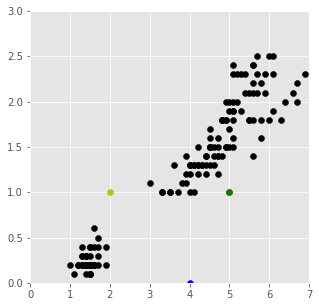

In [100]:
np.random.seed(30)
k = 4
centroids = {
    i+1: [np.random.randint(0, 6), np.random.randint(0, 3)]
    for i in range(k)
}
    
fig = plt.figure(figsize=(5, 5))
plt.scatter(df_iris['PetalLengthCm'], df_iris['PetalWidthCm'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b', 4: 'y'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 7)
plt.ylim(0, 3)
plt.show()

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species  \
0   1            5.1           3.5            1.4           0.2  Iris-setosa   
1   2            4.9           3.0            1.4           0.2  Iris-setosa   
2   3            4.7           3.2            1.3           0.2  Iris-setosa   
3   4            4.6           3.1            1.5           0.2  Iris-setosa   
4   5            5.0           3.6            1.4           0.2  Iris-setosa   

   distance_from_4  closest color  distance_from_1  distance_from_2  \
0         1.000000        4     y         3.687818         3.687818   
1         1.000000        4     y         3.687818         3.687818   
2         1.063015        4     y         3.785499         3.785499   
3         0.943398        4     y         3.590265         3.590265   
4         1.000000        4     y         3.687818         3.687818   

   distance_from_3  
0         2.607681  
1         2.607681  
2         2.707397  
3       

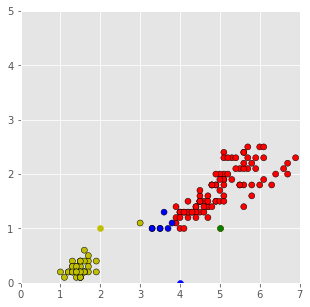

In [101]:
def assignment(df_iris, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2)
        df_iris['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df_iris['PetalLengthCm'] - centroids[i][0]) ** 2
                + (df_iris['PetalWidthCm'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df_iris['closest'] = df_iris.loc[:, centroid_distance_cols].idxmin(axis=1)
    df_iris['closest'] = df_iris['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df_iris['color'] = df_iris['closest'].map(lambda x: colmap[x])
    return df_iris

df_iris = assignment(df_iris, centroids)
print(df_iris.head())

fig = plt.figure(figsize=(5, 5))
plt.scatter(df_iris['PetalLengthCm'], df_iris['PetalWidthCm'], color=df_iris['color'], edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 7)
plt.ylim(0, 5)
plt.show()

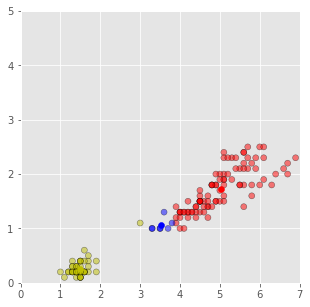

In [103]:
import copy

old_centroids = copy.deepcopy(centroids)

def updateCentroids(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df_iris[df_iris['closest'] == i]['PetalLengthCm'])
        centroids[i][1] = np.mean(df_iris[df_iris['closest'] == i]['PetalWidthCm'])
    return k

centroids = updateCentroids(centroids)
    
fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(df_iris['PetalLengthCm'], df_iris['PetalWidthCm'], color=df_iris['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 7)
plt.ylim(0, 5)
for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
plt.show()

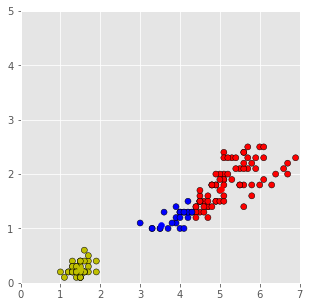

In [104]:
df_iris = assignment(df_iris, centroids)


fig = plt.figure(figsize=(5, 5))
plt.scatter(df_iris['PetalLengthCm'], df_iris['PetalWidthCm'], color=df_iris['color'], edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 7)
plt.ylim(0, 5)
plt.show()

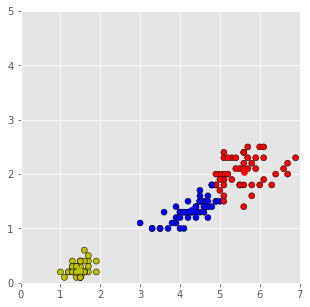

In [107]:
while True:
    closest_centroids = df_iris['closest'].copy(deep=True)
    centroids = update(centroids)
    df_iris = assignment(df_iris, centroids)
    if closest_centroids.equals(df_iris['closest']):
        break
        
fig = plt.figure(figsize=(5, 5))
plt.scatter(df_iris['PetalLengthCm'], df_iris['PetalWidthCm'], color=df_iris['color'], edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 7)
plt.ylim(0, 5)
plt.show()